# Analysis of Airline data. 

The project below will focus on analyzing airline data to find out what impacts a customers satisfation rating. We will use the **FACT framework** to conduct the analysis. Hoopefully we will come to answer.

First we import the essential libraries that will be used for the analysis.

In [26]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#display all dataframe columns in df.head()
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = 300

#filter out warning messages
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style = 'whitegrid')


## Read in the data.

Read in the data from the **airline.csv** file.

In [27]:
airline_df = pd.read_csv("airline.csv")
airline_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Take a deeper dive into the data.

In [28]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

We shall check whether there are any missing values present in the data.

In [29]:
airline_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

From the observation, the **Arrival Delay in Minutes** has missing values present. Now that we know this, we will deal with it later.

Before moving forward, we will make the header of the columns easier to deal with. we will attempt to remove the space in the middle and also the spacing inbetween.

First change the columns names to lower case.

In [30]:
cols = list(airline_df.columns)
cols = [x.lower().strip() for x in cols]
airline_df.columns = cols
airline_df.columns

Index(['id', 'gender', 'customer type', 'age', 'type of travel', 'class',
       'flight distance', 'inflight wifi service',
       'departure/arrival time convenient', 'ease of online booking',
       'gate location', 'food and drink', 'online boarding', 'seat comfort',
       'inflight entertainment', 'on-board service', 'leg room service',
       'baggage handling', 'checkin service', 'inflight service',
       'cleanliness', 'departure delay in minutes', 'arrival delay in minutes',
       'satisfaction'],
      dtype='object')

In [31]:
airline_df.columns = airline_df.columns.str.replace(' ', '_')
airline_df.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

Now that we have done cleaning the column header, we shall get a statistic description of the data.

In [32]:
airline_df.describe()

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Exploratory analysis

We shall explore the data to get some insight. 

The first thing I will do is create a correlation matrix to see the correlation between the features.

In [33]:
corr = airline_df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,id,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
id,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035657
age,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
flight_distance,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
inflight_wifi_service,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
departure/arrival_time_convenient,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
ease_of_online_booking,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
gate_location,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
food_and_drink,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
online_boarding,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
seat_comfort,0.052164,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521


From the above, we are missing the **satisfaction** variable because it is a categirical variable. We will encode the satisfaction column (plus any categorical variable) using the `LabelEncoder` and remove the last two features namely *departure_delay_in_minutes* and *arrival_delay_in_minutes*.
Then we shall look at the correlation matrix and see if we have gained more insight.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Columns to change to numerical values
airline_df['satisfaction_cat'] = le.fit_transform(airline_df.satisfaction)
airline_df['gender_cat'] = le.fit_transform(airline_df.gender)
airline_df['customer_type_cat'] = le.fit_transform(airline_df.customer_type)
airline_df['class_cat'] = le.fit_transform(airline_df['class'])
airline_df['type_of_travel_cat'] = le.fit_transform(airline_df.type_of_travel)

#Display and see if the changes were made
airline_df[['satisfaction_cat', 'gender_cat', 'customer_type_cat', 'class_cat']]

,satisfaction_cat,gender_cat,customer_type_cat,class_cat
0,0,1,0,2
1,0,1,1,0
2,1,0,0,0
3,0,0,0,0
4,1,1,0,0
...,...,...,...,...
129875,0,1,1,0
129876,1,1,0,0
129877,0,0,0,1
129878,1,1,0,0


In [35]:
#Columns to keep for further analysis
keep = ['satisfaction_cat', 'gender_cat', 'customer_type_cat', 'age', 'type_of_travel_cat', 'class_cat',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']

#Create a copy of the dataframe for machine learning
airline_dff = airline_df[keep].copy()

#Show the first rows
airline_dff.head()

,satisfaction_cat,gender_cat,customer_type_cat,age,type_of_travel_cat,class_cat,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,0,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,1,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,0,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,1,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [36]:
corr = airline_dff.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,satisfaction_cat,gender_cat,customer_type_cat,age,type_of_travel_cat,class_cat,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
satisfaction_cat,1.000000,0.011236,-0.186017,0.134091,-0.449861,-0.448193,0.298085,0.283460,-0.054270,0.168877,-0.002793,0.211340,0.501749,0.348829,0.398234,0.322205,0.312424,0.248680,0.237252,0.244918,0.307035
gender_cat,0.011236,1.000000,-0.030958,0.008996,0.009503,-0.011574,0.003616,0.005901,0.008995,0.005893,-0.000863,0.001730,-0.045022,-0.030756,0.003843,0.006447,0.031047,0.036356,0.008462,0.038504,0.002867
customer_type_cat,-0.186017,-0.030958,1.000000,-0.284172,-0.308236,0.042994,-0.226021,-0.005757,-0.206873,-0.018059,0.004465,-0.056997,-0.189083,-0.156239,-0.106001,-0.054172,-0.046841,0.024874,-0.031243,0.023292,-0.081302
age,0.134091,0.008996,-0.284172,1.000000,-0.044808,-0.116921,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565
type_of_travel_cat,-0.449861,0.009503,-0.308236,-0.044808,1.000000,0.486718,-0.266792,-0.105865,0.257102,-0.134078,-0.029869,-0.068986,-0.224020,-0.127717,-0.152936,-0.059794,-0.139612,-0.033012,0.016247,-0.023538,-0.084615
class_cat,-0.448193,-0.011574,0.042994,-0.116921,0.486718,1.000000,-0.426925,-0.024962,0.087152,-0.095138,-0.005701,-0.080773,-0.297645,-0.212334,-0.183162,-0.210649,-0.198825,-0.166588,-0.157494,-0.159285,-0.129623
flight_distance,0.298085,0.003616,-0.226021,0.099459,-0.266792,-0.426925,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648
inflight_wifi_service,0.283460,0.005901,-0.005757,0.016116,-0.105865,-0.024962,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300
departure/arrival_time_convenient,-0.054270,0.008995,-0.206873,0.036960,0.257102,0.087152,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862
ease_of_online_booking,0.168877,0.005893,-0.018059,0.022565,-0.134078,-0.095138,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125


Maybe nothing of notice has happened or maybe we can now see the correlation between the different features present in our analysis. Below we shall do further exploratory analysis to the dataset to get some insight.

Find how many people were satisfied with the airline.

<AxesSubplot:title={'center':'Bar plot of Count of Satisfied vs Neutral'}>

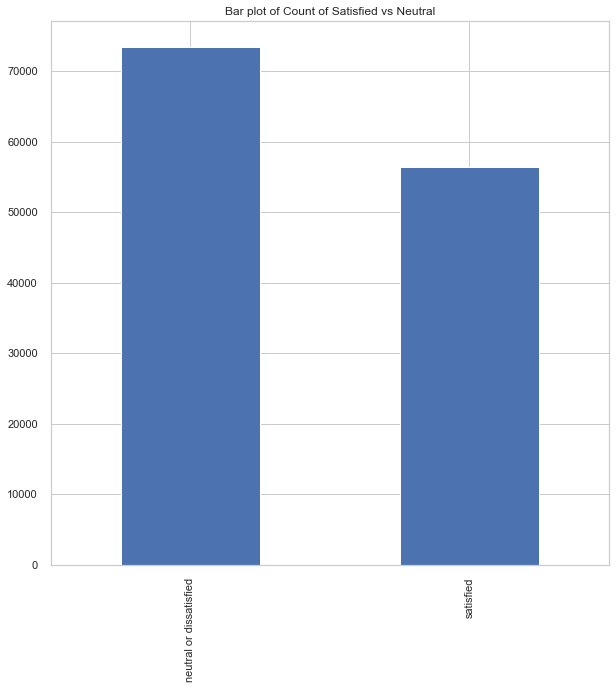

In [37]:
airline_df.satisfaction.value_counts().plot(kind = 'bar', figsize = (10,10), title = 'Bar plot of Count of Satisfied vs Neutral')

Plot a histogram and boxplot of the **Food and Drink** with satisfaction.

[Text(0.5, 1.0, 'Box plot of Food and Drink')]

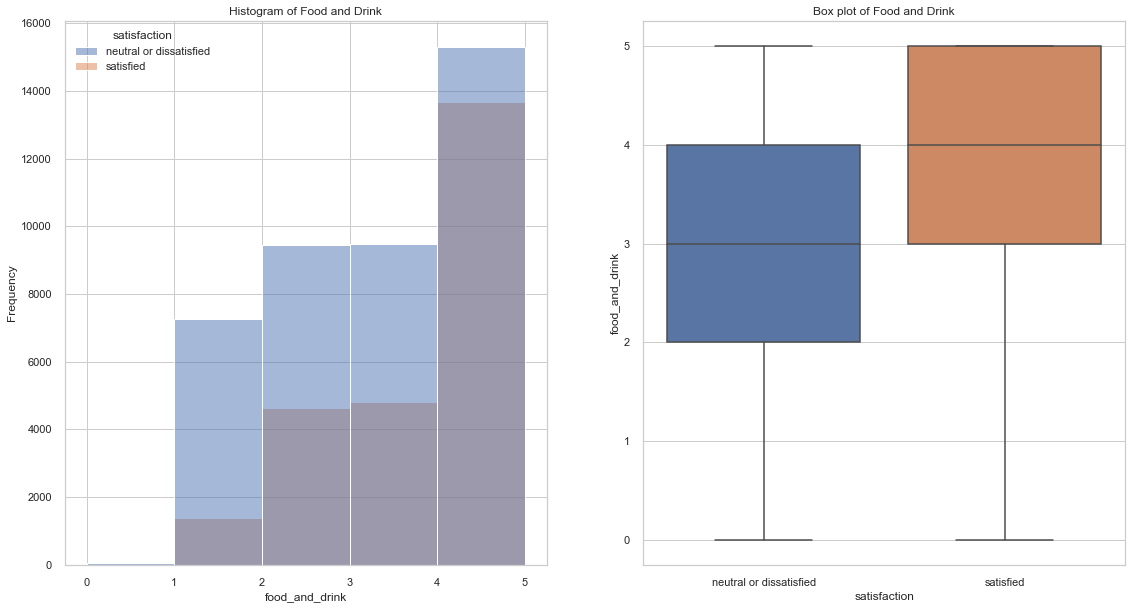

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19,10))
sns.histplot(data = airline_df, x  = 'food_and_drink', hue = 'satisfaction', stat = 'frequency', binwidth = 1, ax = ax1)
sns.boxplot(data = airline_df, y = 'food_and_drink', x = 'satisfaction', ax = ax2)
ax1.set(title = 'Histogram of Food and Drink')
ax2.set(title = 'Box plot of Food and Drink')

Let us see if the wifi service has an impact of the satisfaction.

[Text(0.5, 1.0, 'Box plot of inflight wifi service')]

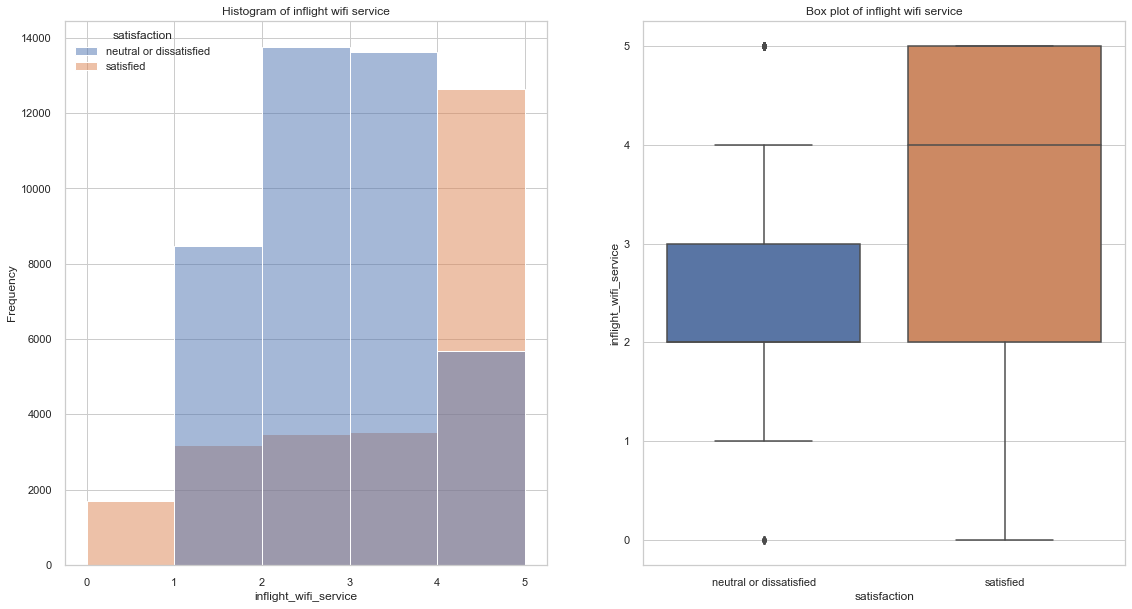

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19,10))
sns.histplot(data = airline_df, x  = 'inflight_wifi_service', hue = 'satisfaction', stat = 'frequency', binwidth = 1, ax = ax1)
sns.boxplot(data = airline_df, y = 'inflight_wifi_service', x = 'satisfaction', ax = ax2)
ax1.set(title = 'Histogram of inflight wifi service')
ax2.set(title = 'Box plot of inflight wifi service')

[Text(0.5, 1.0, 'Box plot of Infight service')]

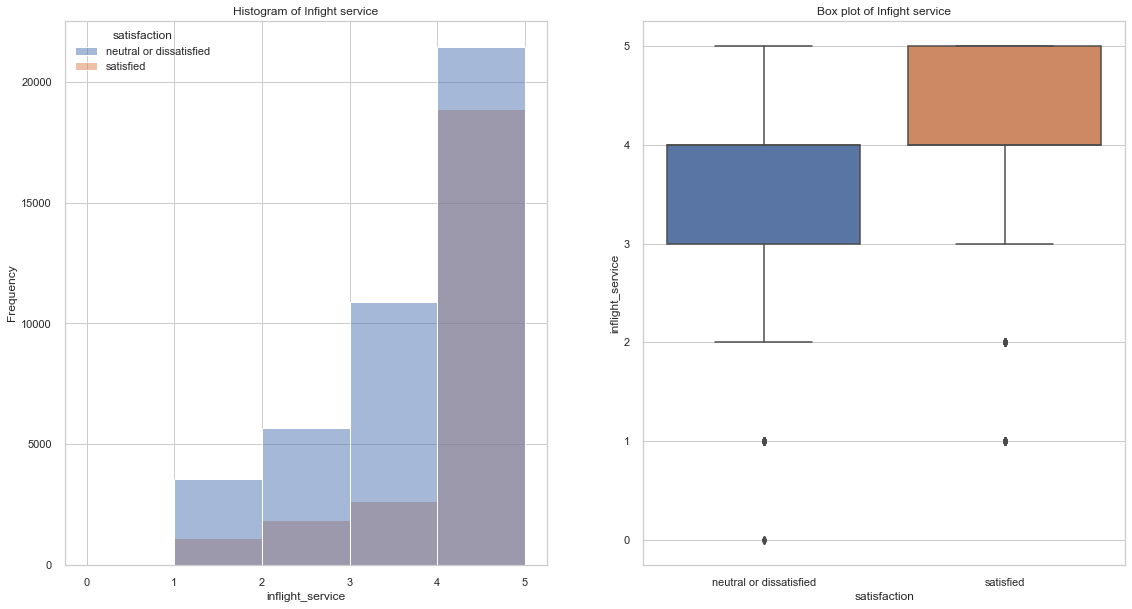

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19,10))
sns.histplot(data = airline_df, x  = 'inflight_service', hue = 'satisfaction', stat = 'frequency', binwidth = 1, ax = ax1)
sns.boxplot(data = airline_df, y = 'inflight_service', x = 'satisfaction', ax = ax2)
ax1.set(title = 'Histogram of Infight service')
ax2.set(title = 'Box plot of Infight service')

[Text(0.5, 1.0, 'Box plot of Age')]

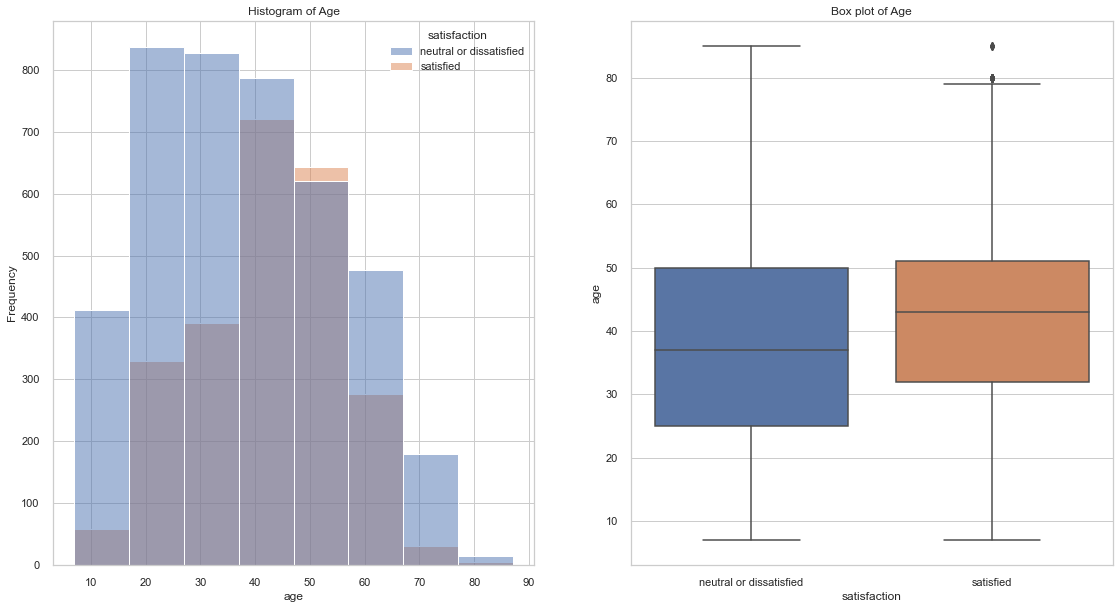

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19,10))
sns.histplot(data = airline_df, x  = 'age', hue = 'satisfaction', stat = 'frequency', binwidth = 10, ax = ax1)
sns.boxplot(data = airline_df, y = 'age', x = 'satisfaction', ax = ax2)
ax1.set(title = 'Histogram of Age')
ax2.set(title = 'Box plot of Age')

## Model Selection

Before we model the data, we shall try to use the features that will be very useful to the model. Instead of a kitchen sink model whereby we throw all the features into the model, we shall use a feature selection algorithm to decided which features will be in the model. 

The first thing we do is split the data between the label that we want to predict and the features used by the model.

In [42]:
airline_label = airline_dff['satisfaction_cat']
airline_features = airline_dff[['gender_cat', 'customer_type_cat', 'age', 'type_of_travel_cat', 'class_cat',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness']]
airline_features.head()

,gender_cat,customer_type_cat,age,type_of_travel_cat,class_cat,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

skb = SelectKBest(score_func= chi2, k = 'all')
skb.fit(airline_features, airline_label)
print(f'{"Feature":40s}: Scores')
print(60*'-')
for var, name in sorted(zip(skb.scores_, airline_dff.columns), key = lambda x:x[0], reverse = True):
    print(f'{name:<40}:{var:.3f}')

Feature                                 : Scores
------------------------------------------------------------
class_cat                               :9645858.737
food_and_drink                          :18340.344
age                                     :18151.634
type_of_travel_cat                      :16962.712
customer_type_cat                       :13539.489
seat_comfort                            :10916.107
online_boarding                         :7993.086
flight_distance                         :6758.345
inflight_entertainment                  :6602.710
on-board_service                        :6554.606
inflight_service                        :6429.598
gender_cat                              :3671.314
baggage_handling                        :3545.003
gate_location                           :3201.588
leg_room_service                        :3079.236
checkin_service                         :2961.594
departure/arrival_time_convenient       :2639.965
inflight_wifi_service           

From the above observation, the feature **ease_of_online_booking** has a p_value < 0.05 so it won't be in our machine learning algorithm but the rest are going to be present in the model.
Next we will use the `logistic regression` to model our data and predict the satisfaction variable.

## Logistic Regression

Now we will use the Logistice regression to model our data but first we must split our data into train and test datasets.

In [44]:
from sklearn.model_selection import train_test_split
d_train, d_test, l_train, l_test = train_test_split(airline_features, airline_label, test_size = 0.4, random_state = 23)

After splitting the data, we can create our model.

In [45]:
from sklearn.linear_model import LogisticRegression

airline_model = LogisticRegression(C = 1E6, random_state = 23)
airline_model.fit(d_train, l_train)

LogisticRegression(C=1000000.0, random_state=23)

In [46]:
airline_model.coef_

array([[-1.88747635e-01, -8.39793690e-01, -1.50899081e-02,
        -1.34977904e+00, -1.68168000e+00, -6.84872411e-05,
         3.70965331e-01, -8.31632655e-02, -2.60221193e-01,
        -1.02645835e-01, -4.11889339e-01,  5.84403821e-01,
         8.70763381e-03,  6.51534777e-01,  2.70292352e-01,
         1.26334376e-01, -2.02971705e-01,  1.29702870e-01,
        -2.31585655e-01, -2.89431082e-02]])

Print out metrics to see how the model performed.

In [47]:
from sklearn import metrics

# Classify test data and display score and report
score = airline_model.score(d_test, l_test)
print(f'Logistic Regression [Airline Data] Score = {score:.1%}\n')
predicted = airline_model.predict(d_test)
print('Classification Report:')
print(metrics.classification_report(l_test, predicted))
print("Primitive confusion matrix")
print(metrics.confusion_matrix(l_test, predicted))

Logistic Regression [Airline Data] Score = 84.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     29330
           1       0.82      0.81      0.82     22622

    accuracy                           0.84     51952
   macro avg       0.84      0.84      0.84     51952
weighted avg       0.84      0.84      0.84     51952

Primitive confusion matrix
[[25193  4137]
 [ 4195 18427]]


Plot a heatmap of the confusion matrix so it is easier to understand.

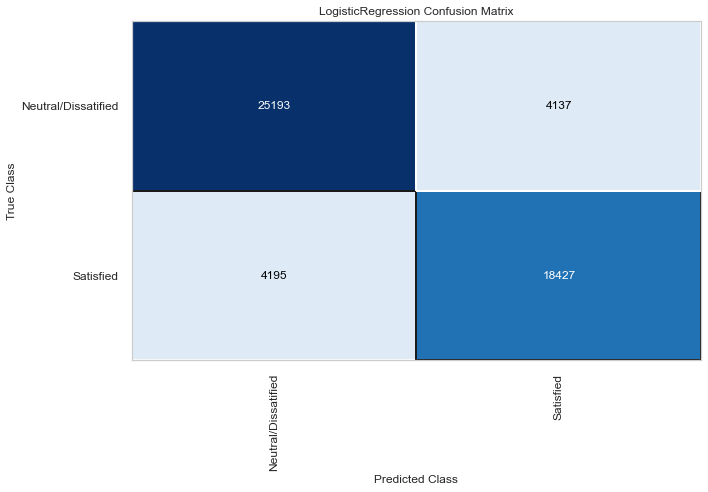

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize = (10,7))

visualizer = ConfusionMatrix(airline_model ,encoder = {0:'Neutral/Dissatified' , 1:'Satisfied'}, cmap = 'Blues', ax = ax)
visualizer.fit(d_train, l_train)
visualizer.score(d_test, l_test)
visualizer.show()